# This notebook stands for exploratory data analysis (EDA) from which some insights from the data can be found.

In [1]:
!git clone https://github.com/OopsWrongCode/nlp-project.git

Cloning into 'nlp-project'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 65 (delta 11), reused 55 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 16.90 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
%cd nlp-project/

/kaggle/working/nlp-project


In [3]:
%pip install regex


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]  

True

In [5]:
from data.data_loader import loader

PATH = loader()
os.listdir(PATH)

Dataset downloaded at path: /kaggle/input/mbti-personality-type-twitter-dataset


['twitter_MBTI.csv']

In [6]:
file_path = os.path.join(PATH,os.listdir(PATH)[0])

In [7]:
df = pd.read_csv(file_path, index_col='Unnamed: 0')

In [ ]:
# from sklearn.model_selection import train_test_split


# train, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
# valid, test = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

In [ ]:
# test.drop('label', axis=1, inplace=True)

In [ ]:
df.head()

,text,label
7343,I checked in at Margie's Candies on #Yelp http...,intj
2908,So…Suga is next… we are still freaking out abo...,enfj
6310,you people don't understand henry creel like i...,infp
1392,@Ezysummers @beanyzilla @trailerparkbaby https...,enfp
1138,4k https://t.co/uIkBxpnCX4|||idk if i’ve ever ...,infj


In [ ]:
df.iloc[7]['text']

'And a commitment to a sprint goal is NOT about promising to hit it.\nIts about promising that you do your best to hi… https://t.co/moOyqTI8Dl|||Tester, the one who reminds the team what they forgot to implement.\n(Not exclusive)|||How I like doing Scrum or any agile method: https://t.co/4jpyU96IsE|||@BischoffDev 🙌|||@keithburgun I would say that I often feel wiser, more experienced.\nBut by my mindset I still feel fresh / young.|||Scrum is more a template than a recipe.\nMaybe a recipe template.|||@rainersigl Ich werde mich schaukeln lassen😁|||@rainersigl Ich denke auch daran im eigenen Garten drin zu liegen. 😁\nWenn man das noch ergonomisch einen Laptop bedienen könnte …|||@rainersigl 🤔 ich glaube ich leihe mir einmal eine|||@FullSnackTester Helping with personal issues, in a emotional crisis.\nSometimes I think about becoming a coach or therapist.|||@ministryoftest @FullSnackTester Understanding what testing is about and how it\'s done|||@mapau LSB\nBase 2?|||😂 the full thread https

In [ ]:
# print(f"Shape of train : {train.shape}\nShape of validation : {valid.shape}\nShape of test : {test.shape}")

Shape of train : (5467, 2)
Shape of validation : (1172, 2)
Shape of test : (1172, 1)


In [ ]:
df['label'].value_counts(normalize=True).round(4)

label
infp    0.1640
infj    0.1349
intp    0.1034
intj    0.0988
enfp    0.0943
entp    0.0747
enfj    0.0652
isfp    0.0475
isfj    0.0472
istp    0.0414
entj    0.0357
istj    0.0334
esfp    0.0227
esfj    0.0136
estp    0.0127
estj    0.0106
Name: proportion, dtype: float64

In [ ]:
df['token_count'] = [len(sentence.split()) for sentence in df['text']]
df['text_length'] = [len(seq) for seq in df['text']]

In [12]:
# df.iloc[55]['text']

In [29]:
print(f"Number of duplicates: {(len(df) - len(df.drop_duplicates(subset=['text'])))} ({round((len(df) - len(df.drop_duplicates(subset=['text']))) / len(df) * 100,2)}%)")
df = df.drop_duplicates(subset=['text'])

Number of duplicates: 0 (0.0%)


In [ ]:
# import src.utils
# print(src.utils.re.__name__)

regex


In [ ]:
from src.utils import *

import regex as re

def clean_data(data):
    if not isinstance(data, str):
        return ""

    data = re.sub(r'https?://\S+', '', data)             # Удалить ссылки
    data = re.sub(r'@\w+', '', data)                     # Удалить @юзернеймы
    data = re.sub(r'\|\|+|[-_=~]{2,}', ' ', data)        # Удалить спец. символы
    data = re.sub(r'<.*?>', '', data)                    # Удалить HTML-теги
    data = re.sub(r'\p{Emoji}', '', data)                # Удалить эмодзи
    data = re.sub(r'[^\w\s]', '', data)                  # Удалить всё лишнее кроме слов
    data = " ".join(data.split())                        # Привести пробелы в порядок

    return data

df['text'] = df['text'].apply(clean_data)
df['text'] = df['text'].apply(extract_clean_words)

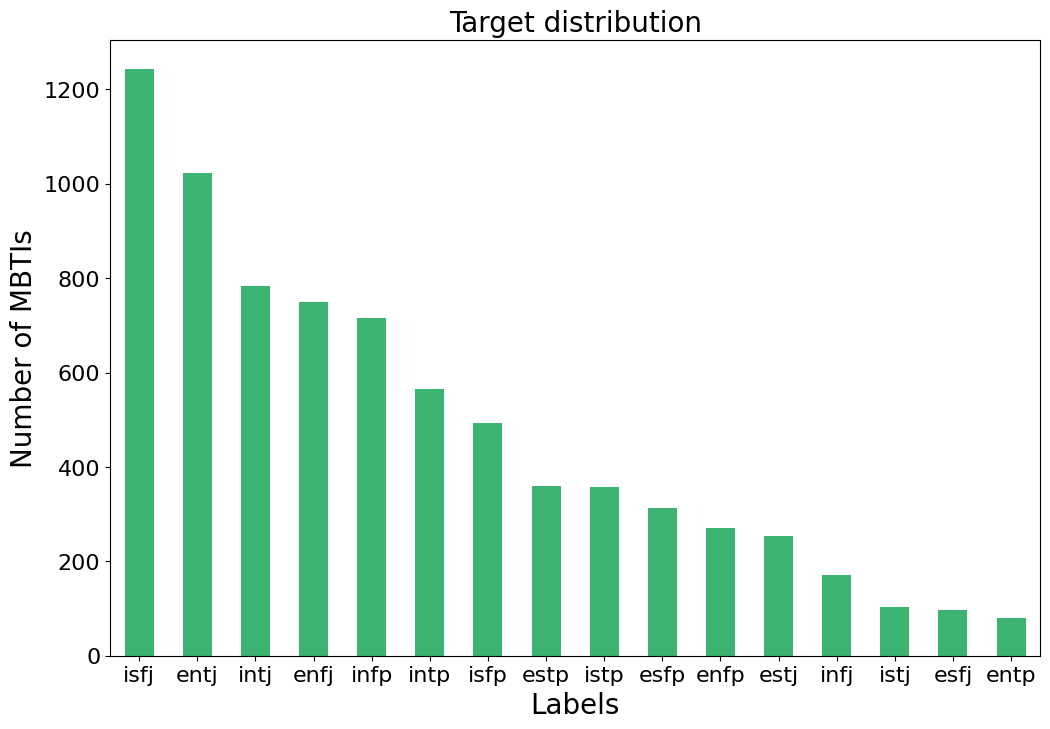

In [34]:
#Visualize the data
fig, ax = plt.subplots(figsize=(12,8))

df['label'].value_counts(sort=True).plot(kind='bar', color='mediumseagreen', fontsize = 16)
x = set(df['label'])

default_x_ticks = range(len(x))

plt.xticks(default_x_ticks, x, rotation=0, fontsize = 16)
plt.title('Target distribution', fontsize = 20)
plt.xlabel('Labels', fontsize = 20)
plt.ylabel('Number of MBTIs', fontsize = 20)

plt.show()

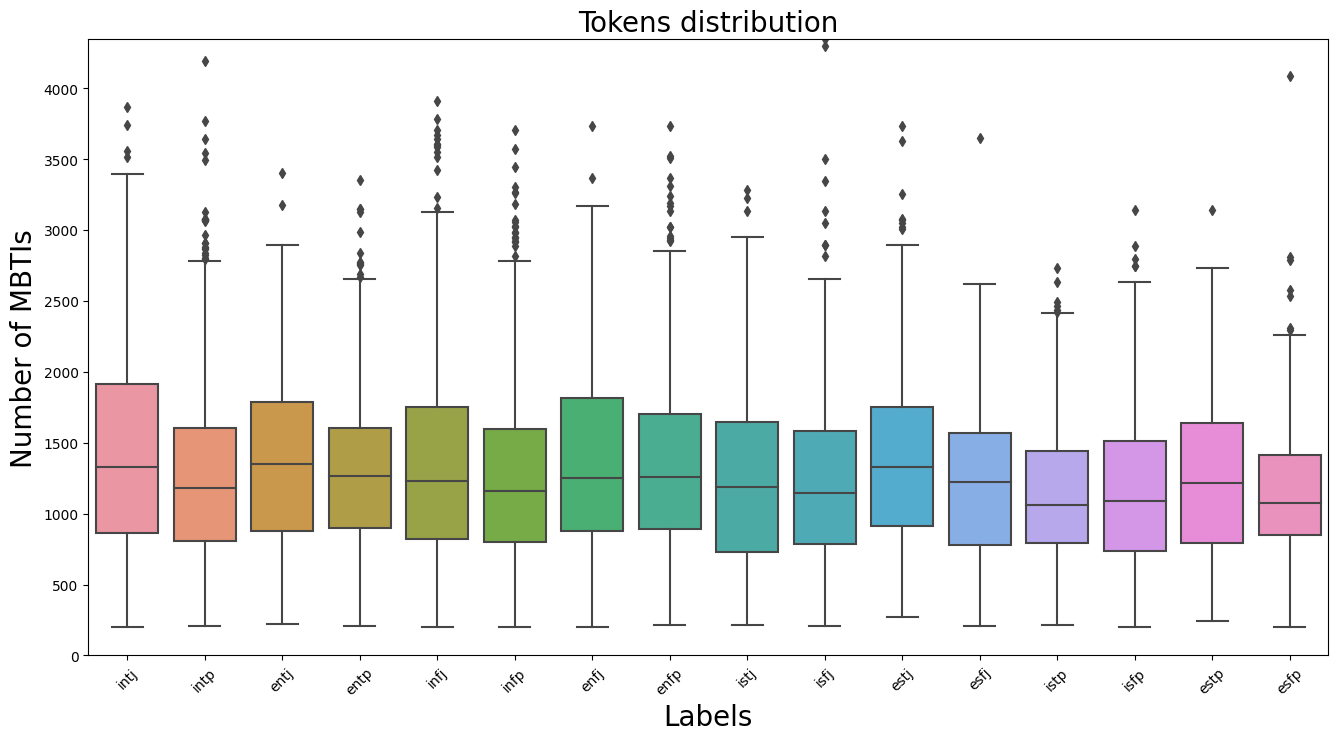

In [35]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x='label', y='token_count', data=df)
plt.title('Tokens distribution', fontsize = 20)
plt.xlabel('Labels', fontsize = 20)
plt.ylabel('Number of MBTIs', fontsize = 20)
plt.ylim((0,df['token_count'].max()))
plt.xticks(rotation=45)
plt.show()

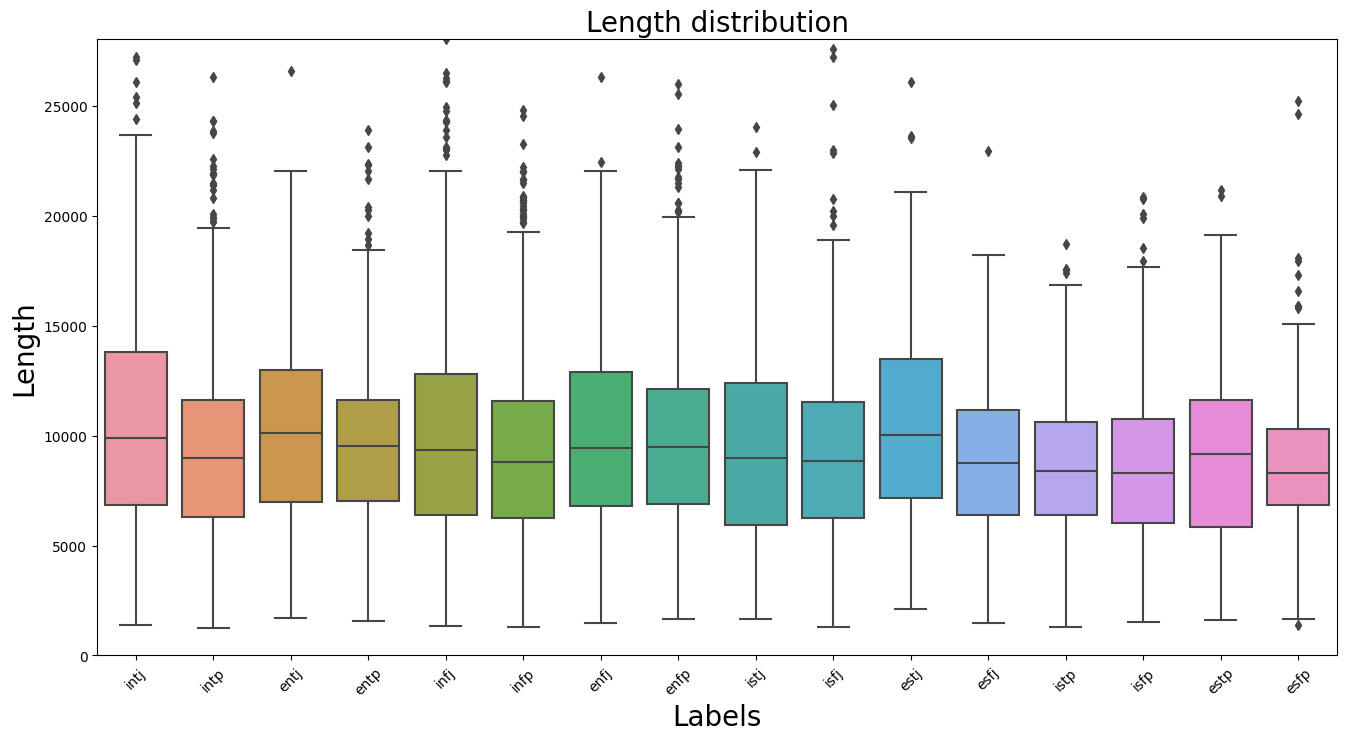

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x='label', y='text_length', data=df)
plt.title('Length distribution', fontsize = 20)
plt.xlabel('Labels', fontsize = 20)
plt.ylabel('Length', fontsize = 20)
plt.ylim((0,df['text_length'].max()))
plt.xticks(rotation=45)
plt.show()

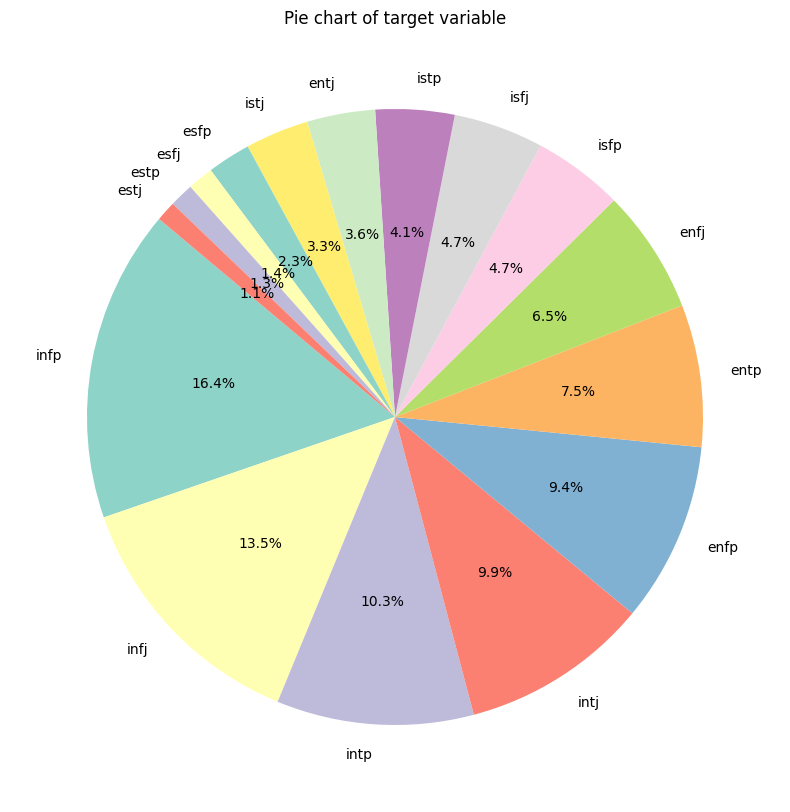

In [37]:
# Embarked town distribution pie chart
embark_counts = df['label'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(embark_counts, labels=embark_counts.index, colors=sns.color_palette('Set3'), autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of target variable')
plt.show()

In [ ]:
sw1 = ["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]
from nltk.corpus import stopwords
sw1 = set(sw1)
sw = stopwords.words("english")
sw = set(sw)
STOPWORDS = set.union(sw1, sw)

# source https://github.com/6/stopwords-json/blob/master/dist/en.json

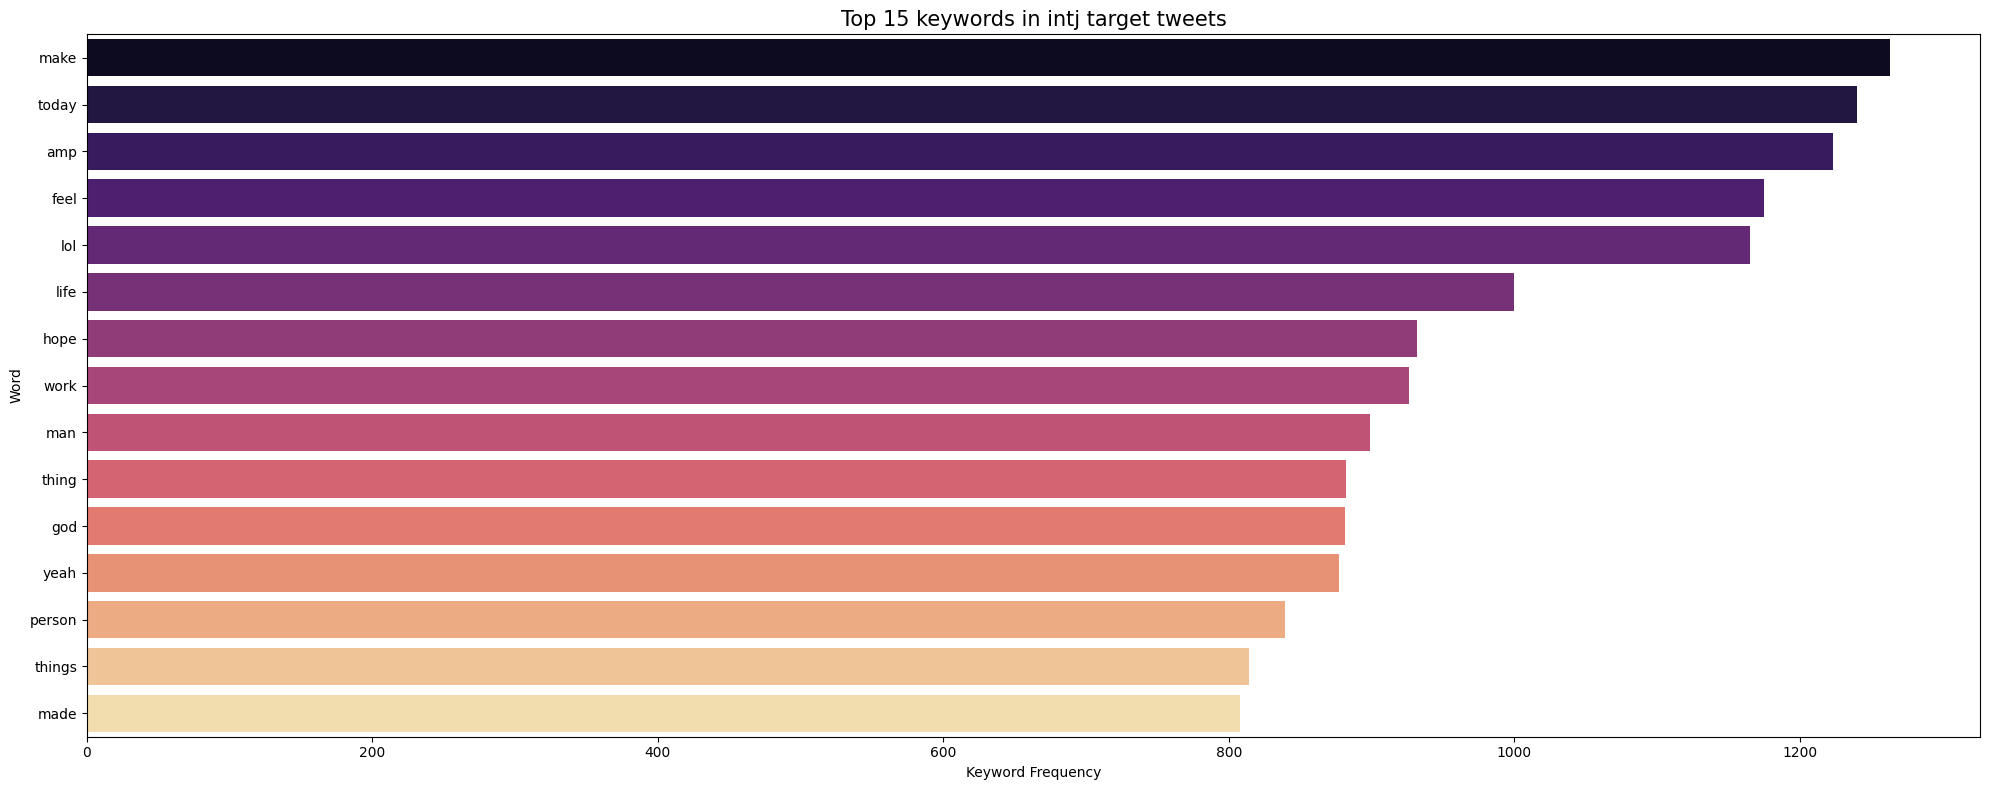

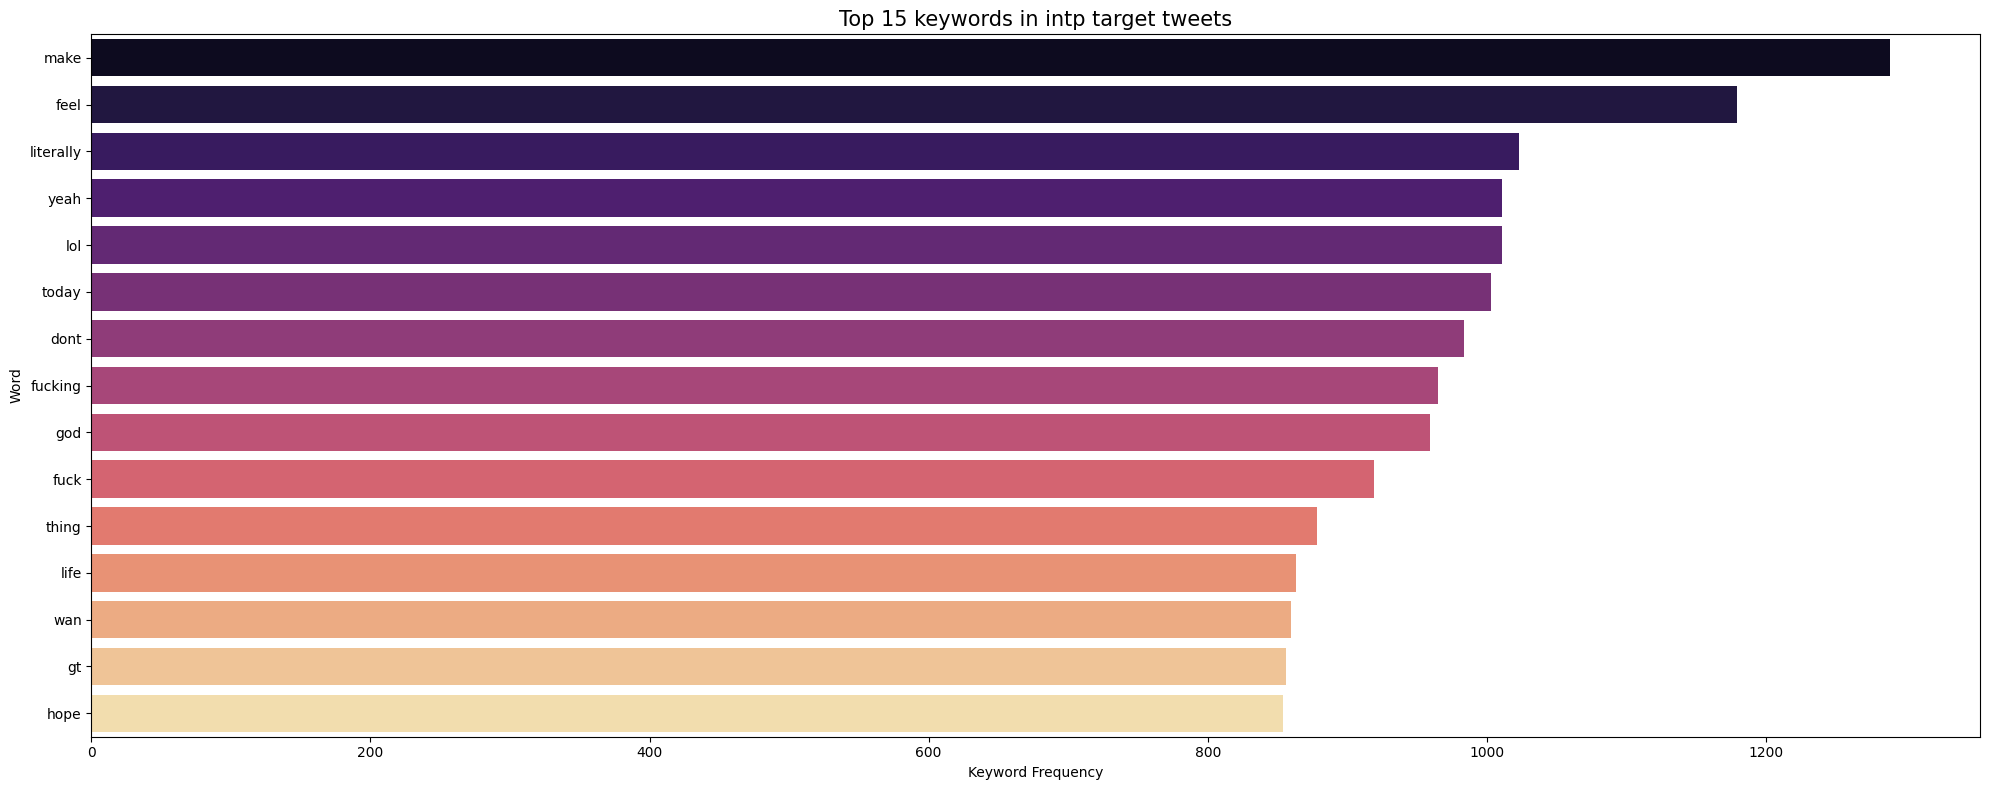

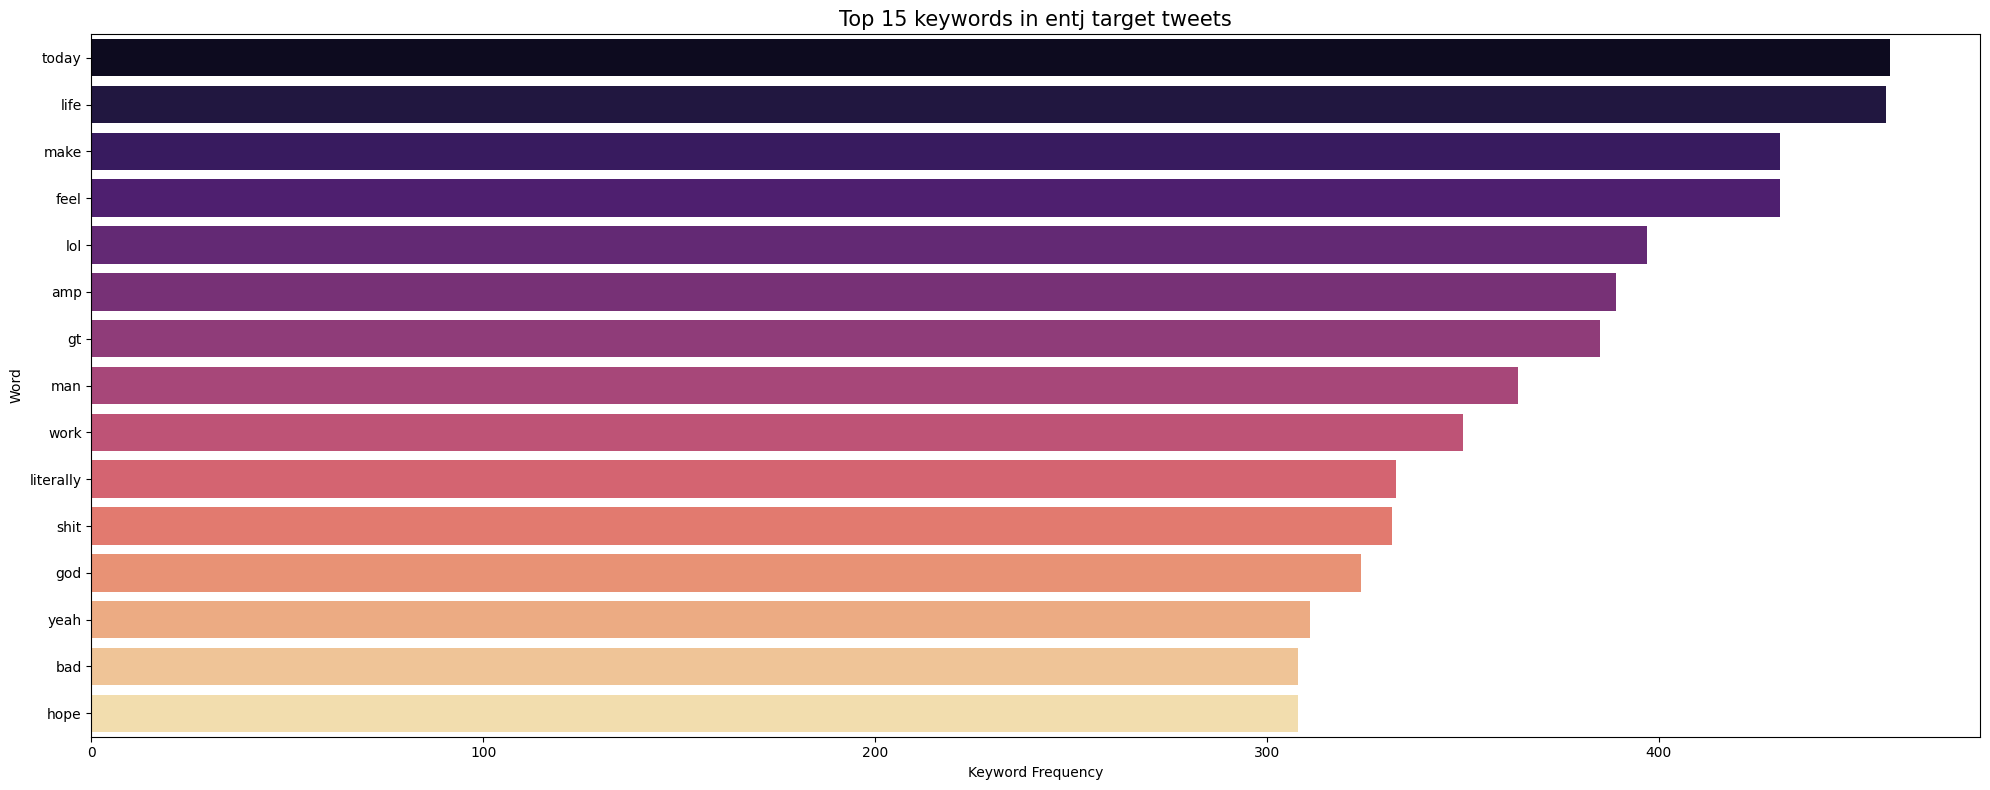

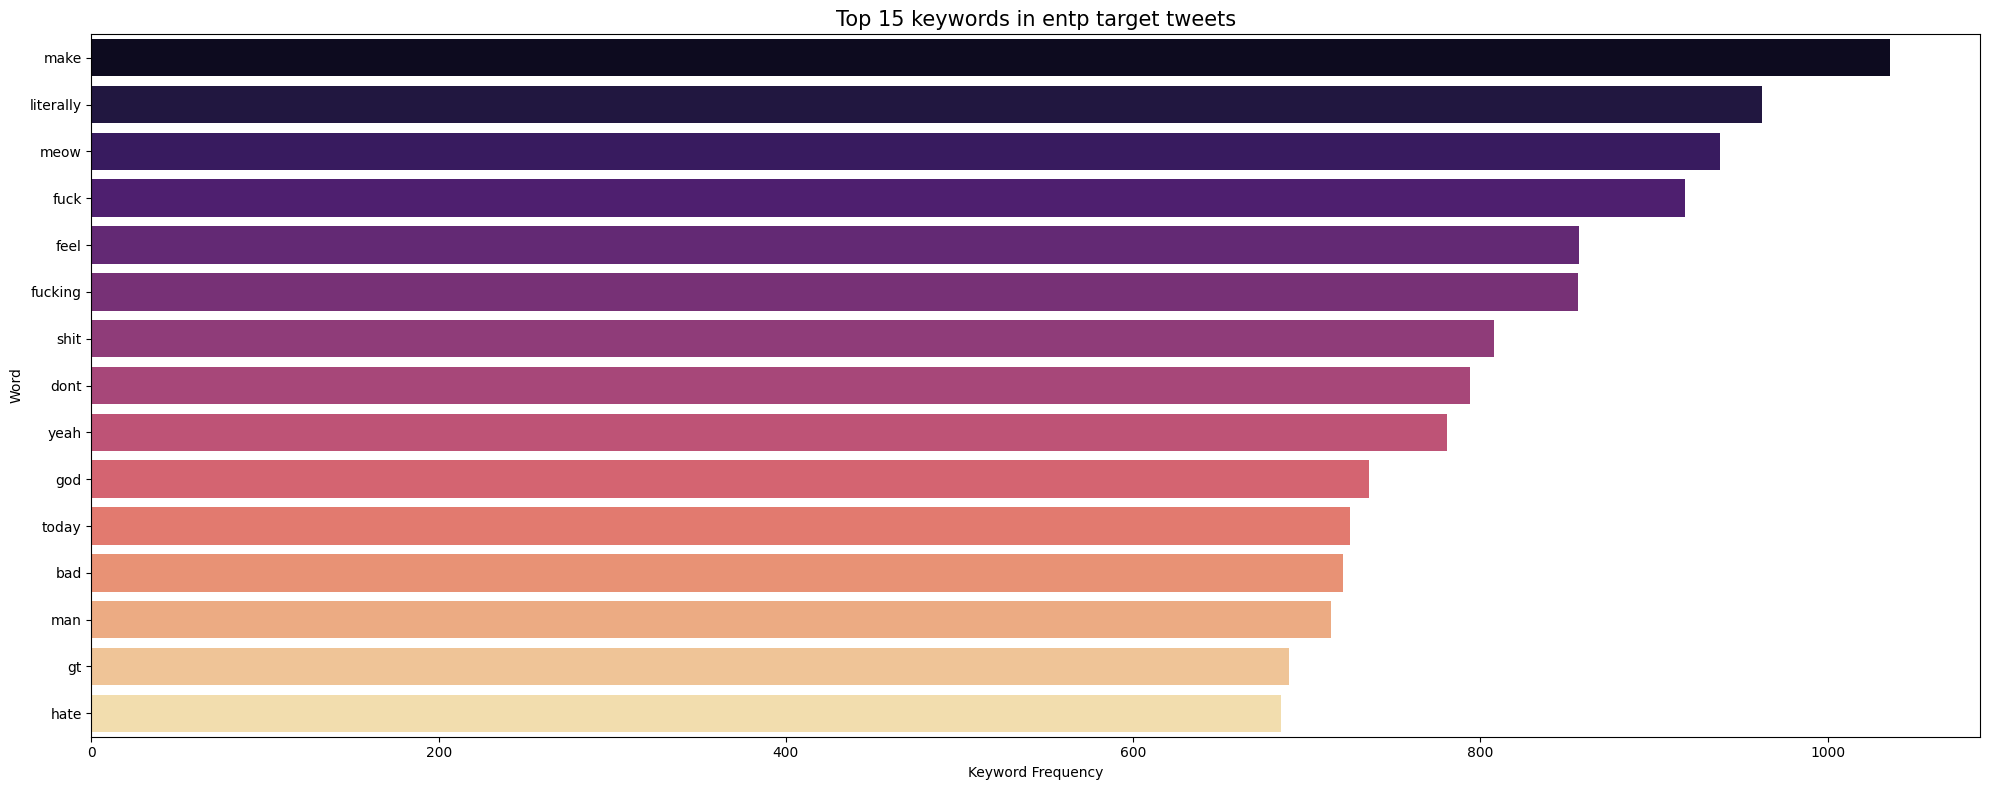

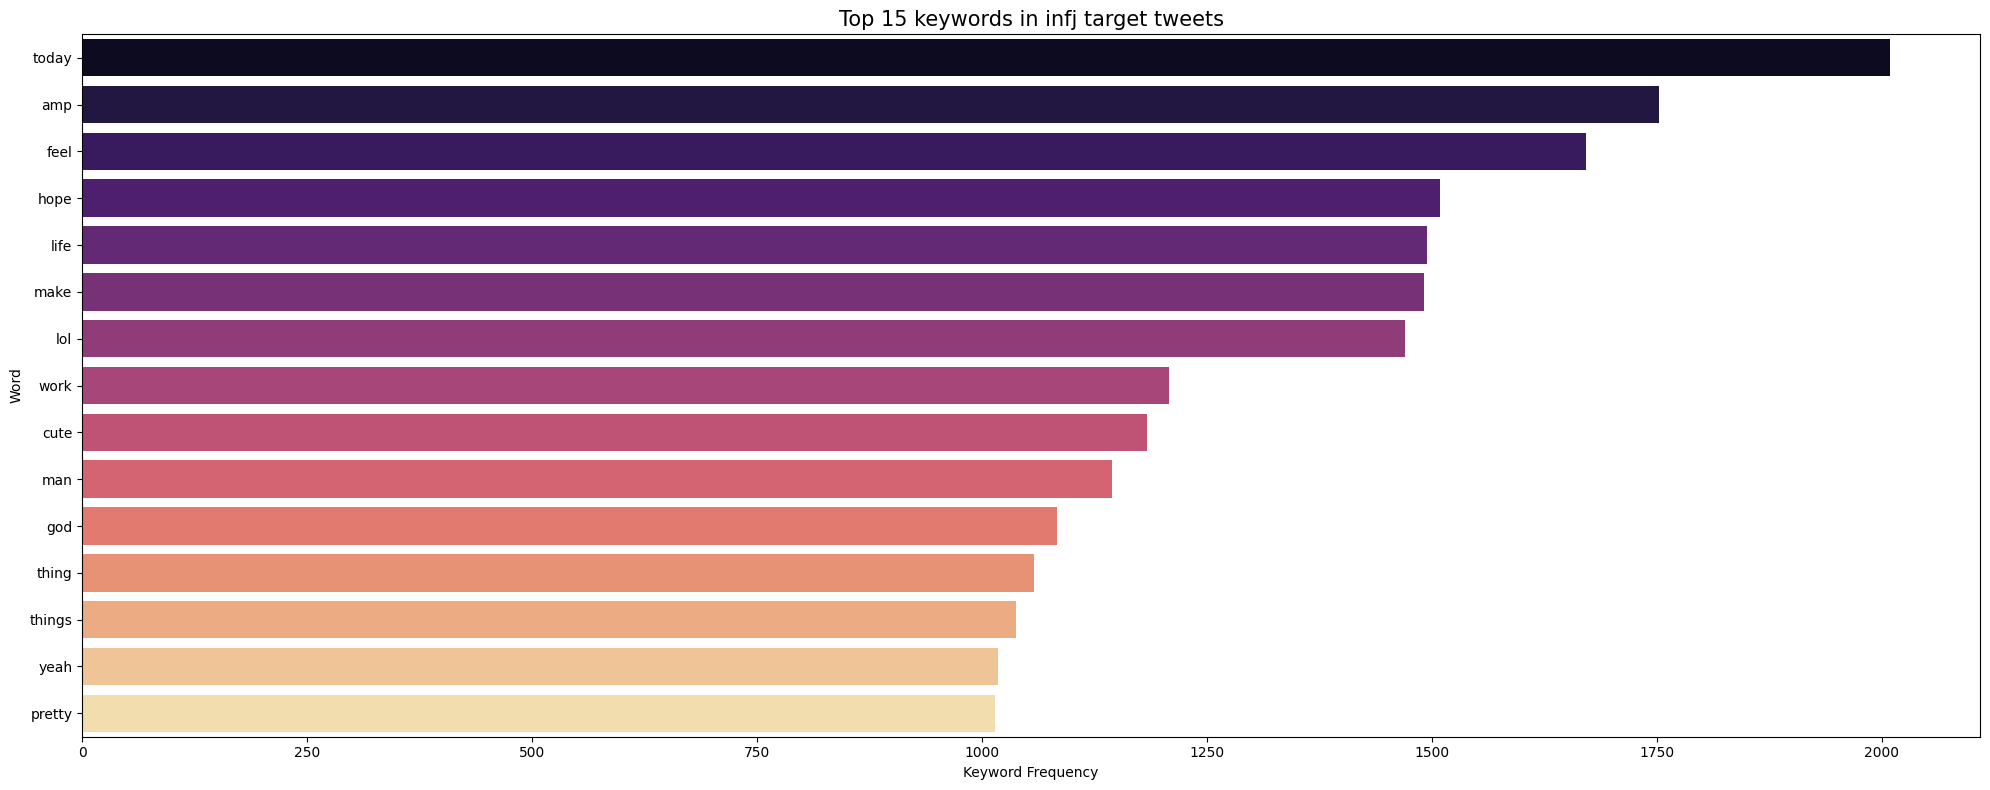

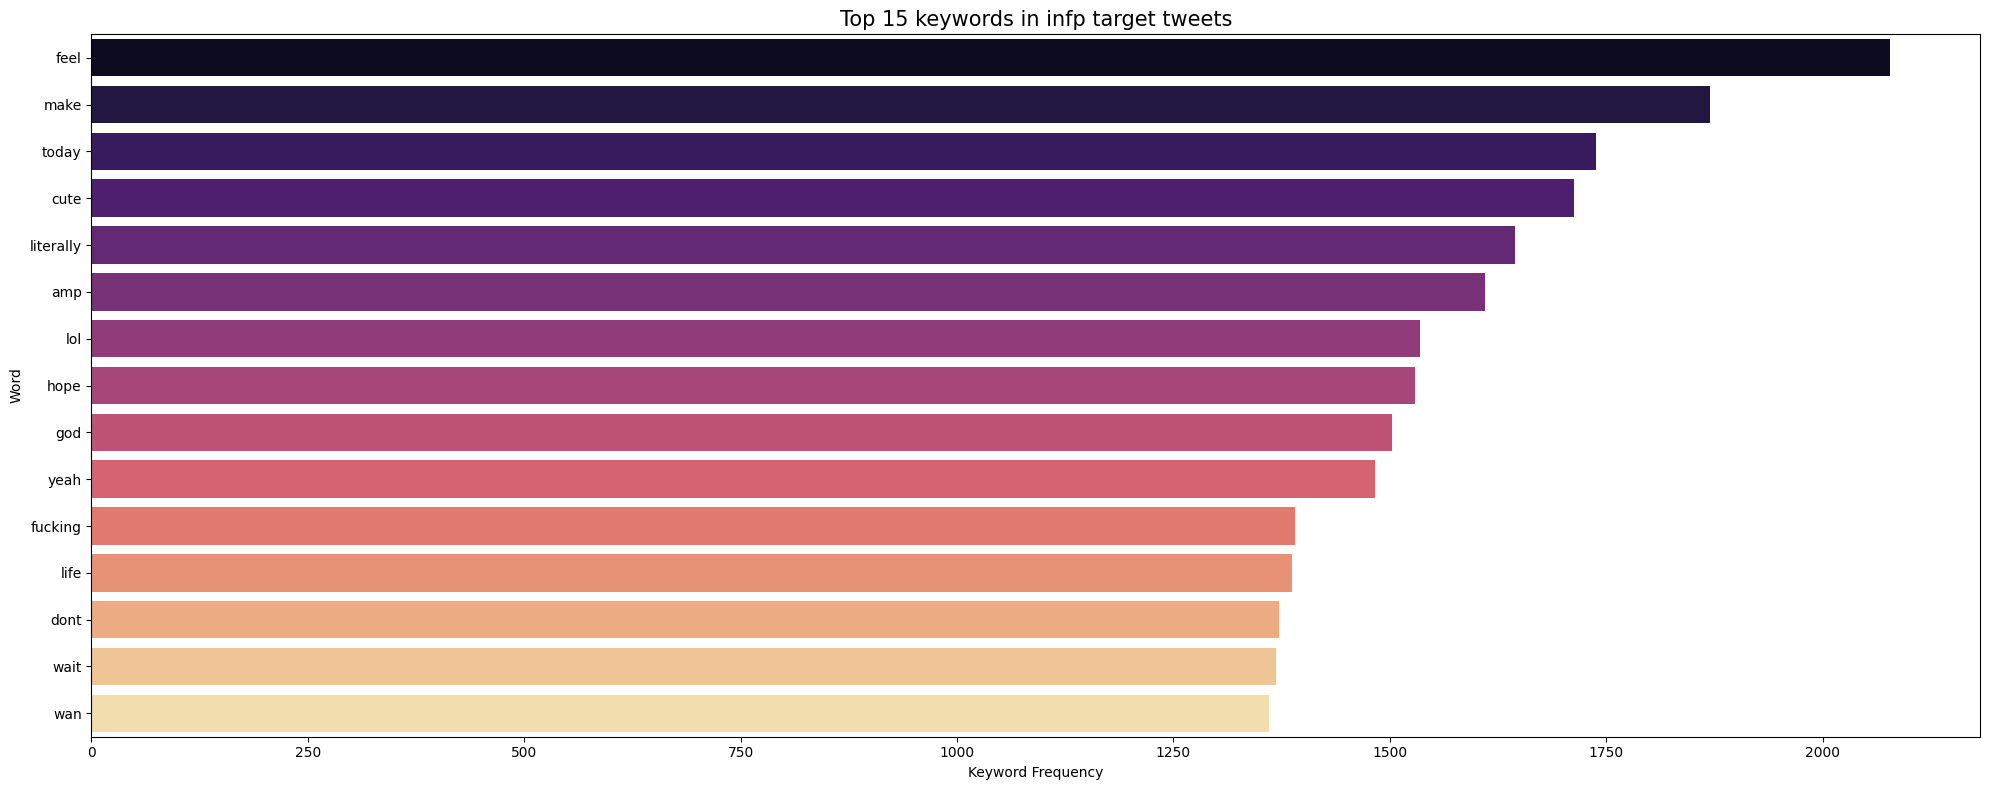

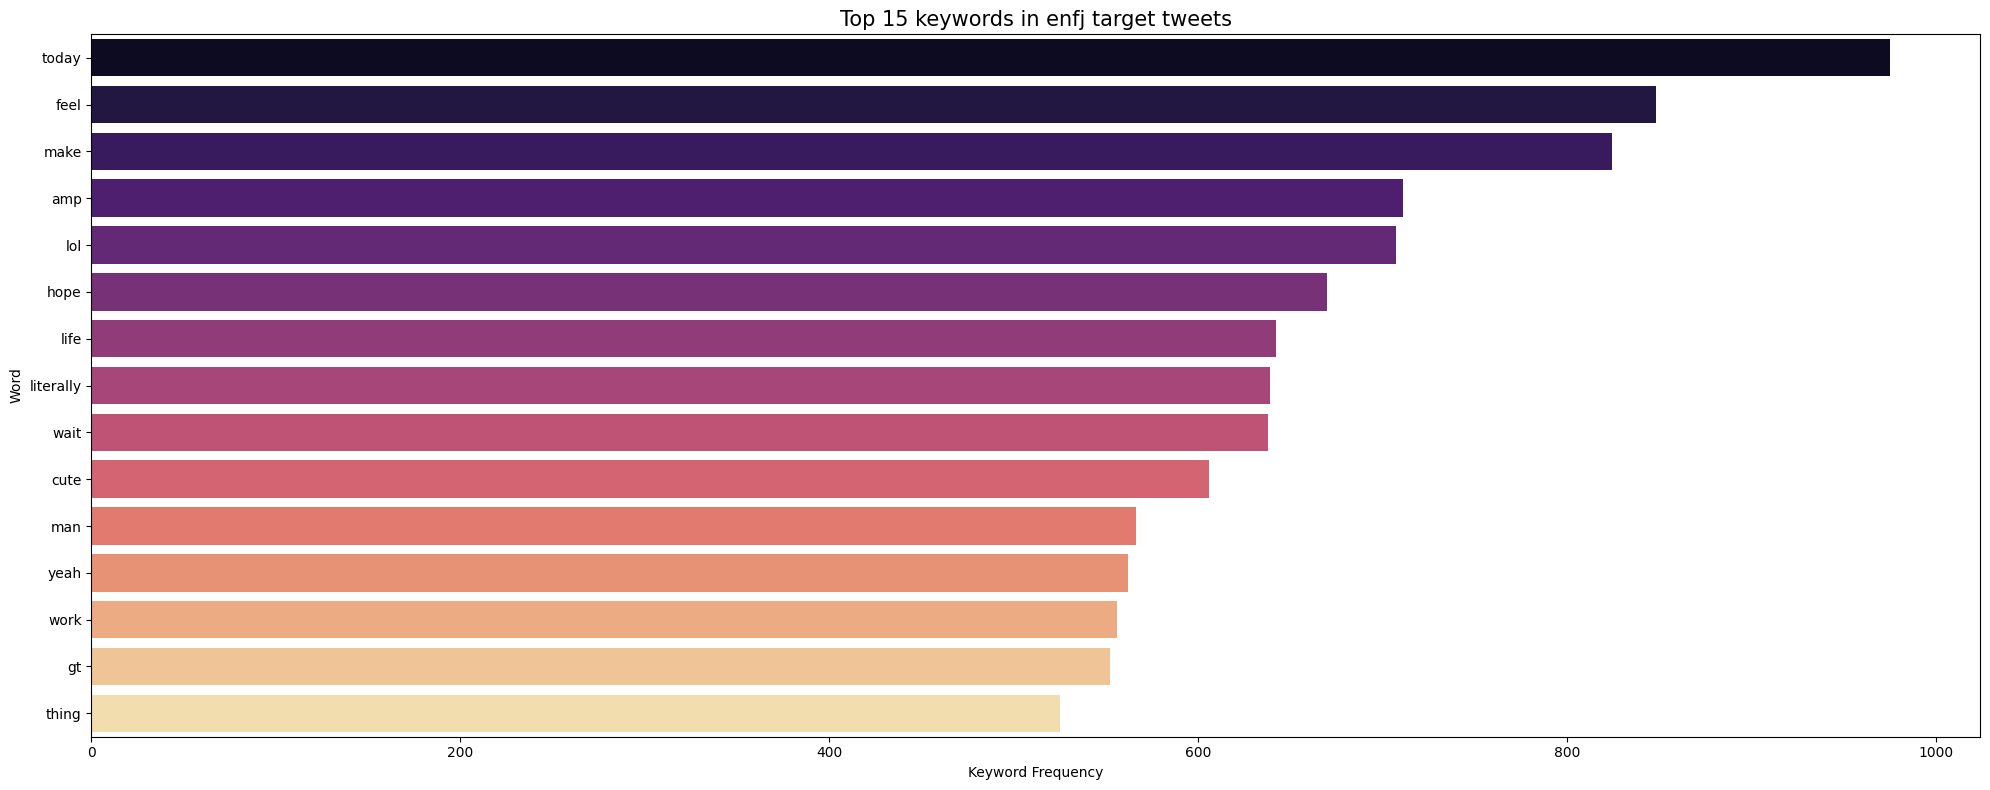

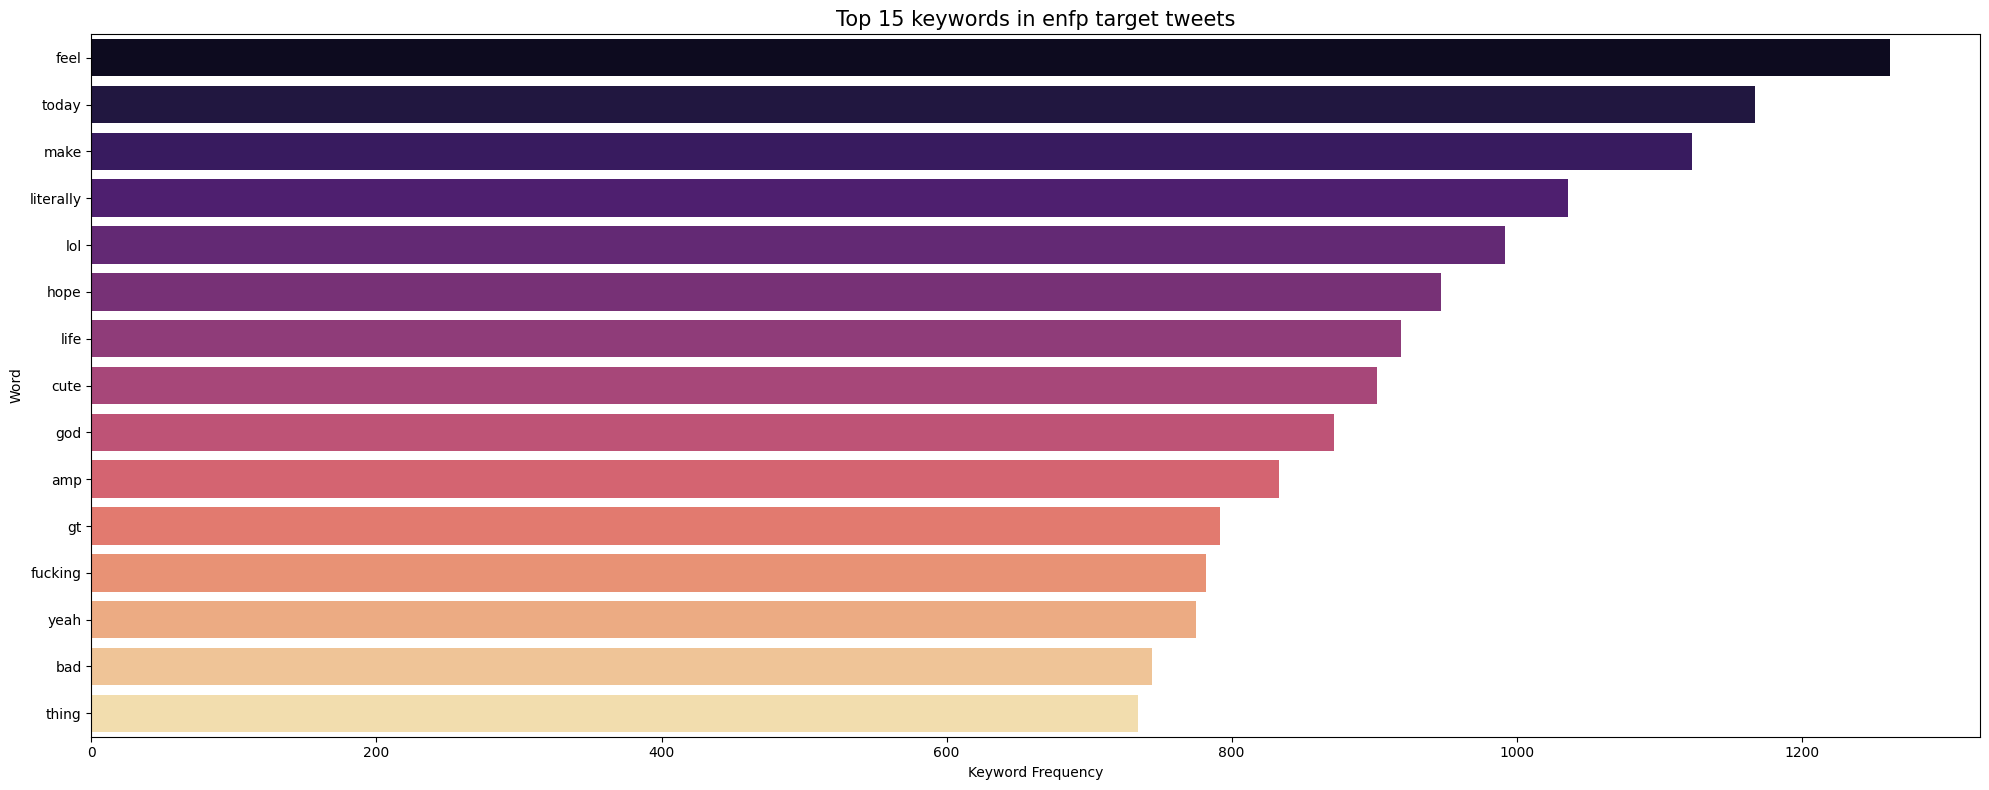

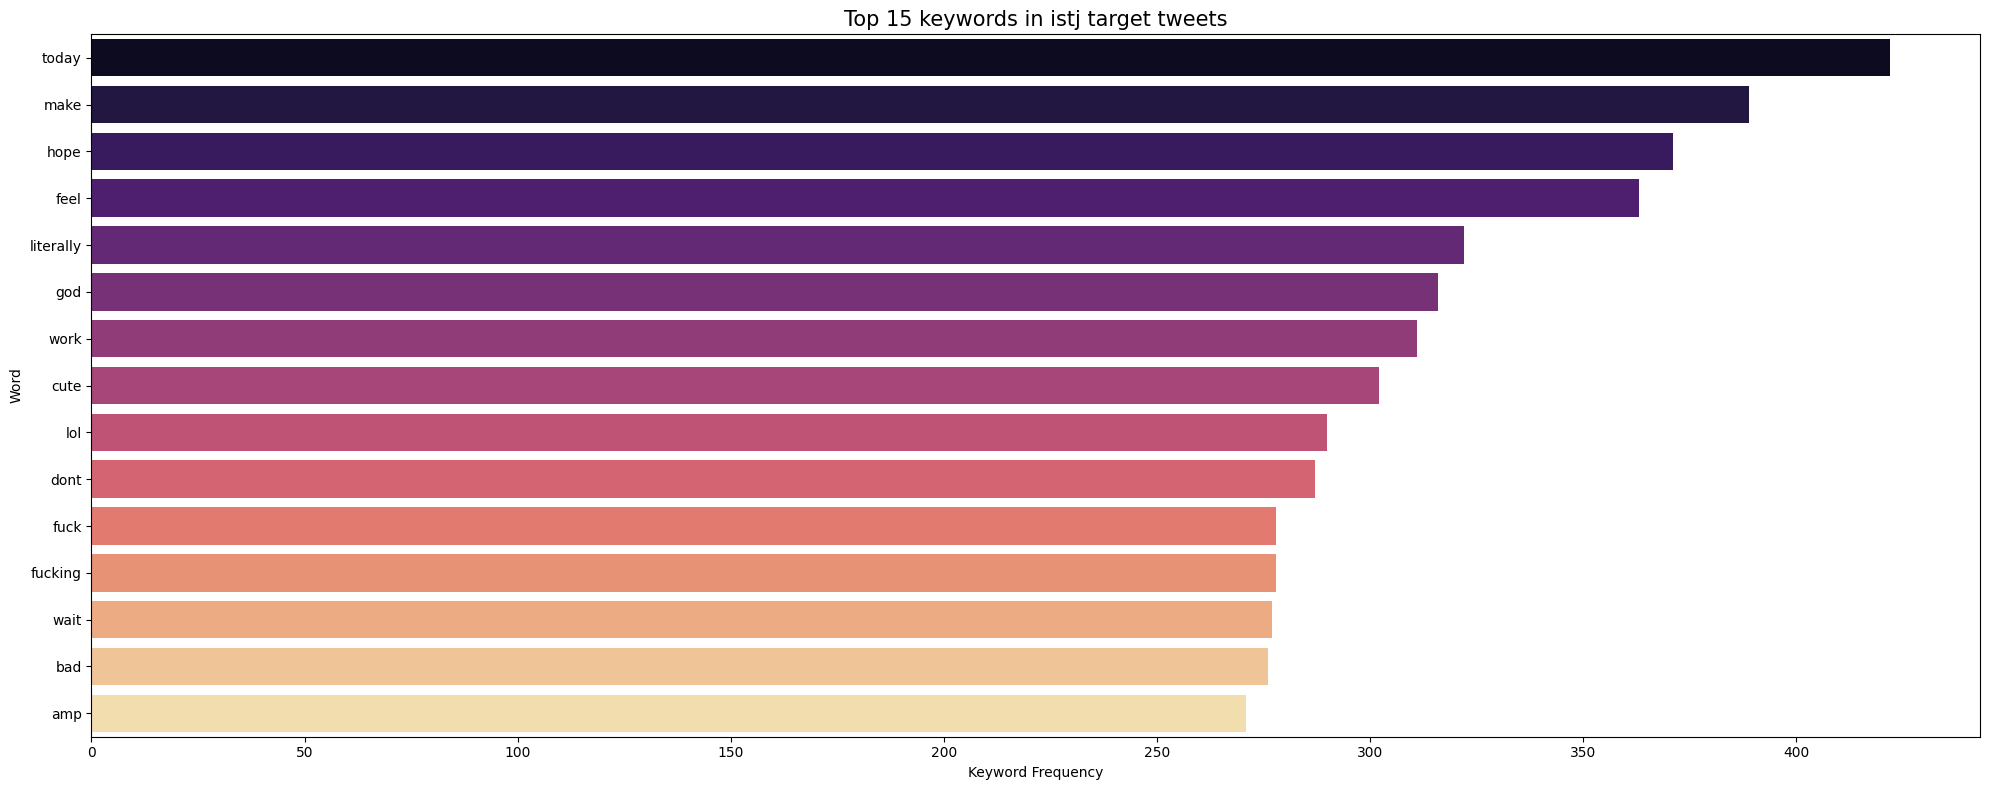

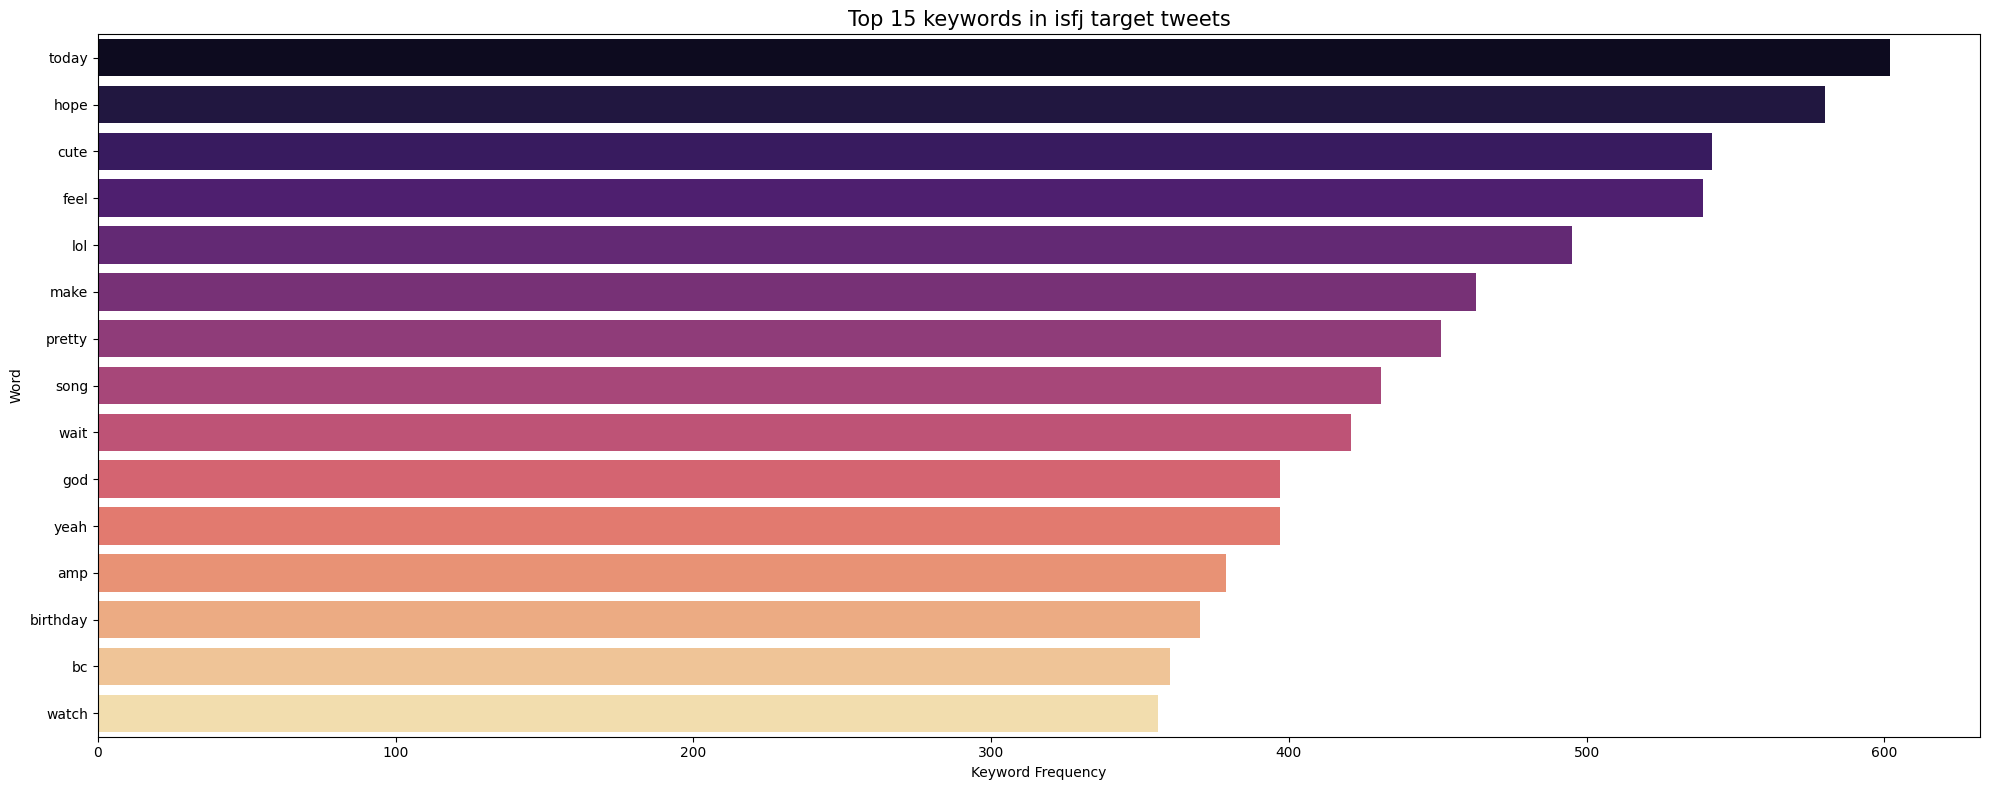

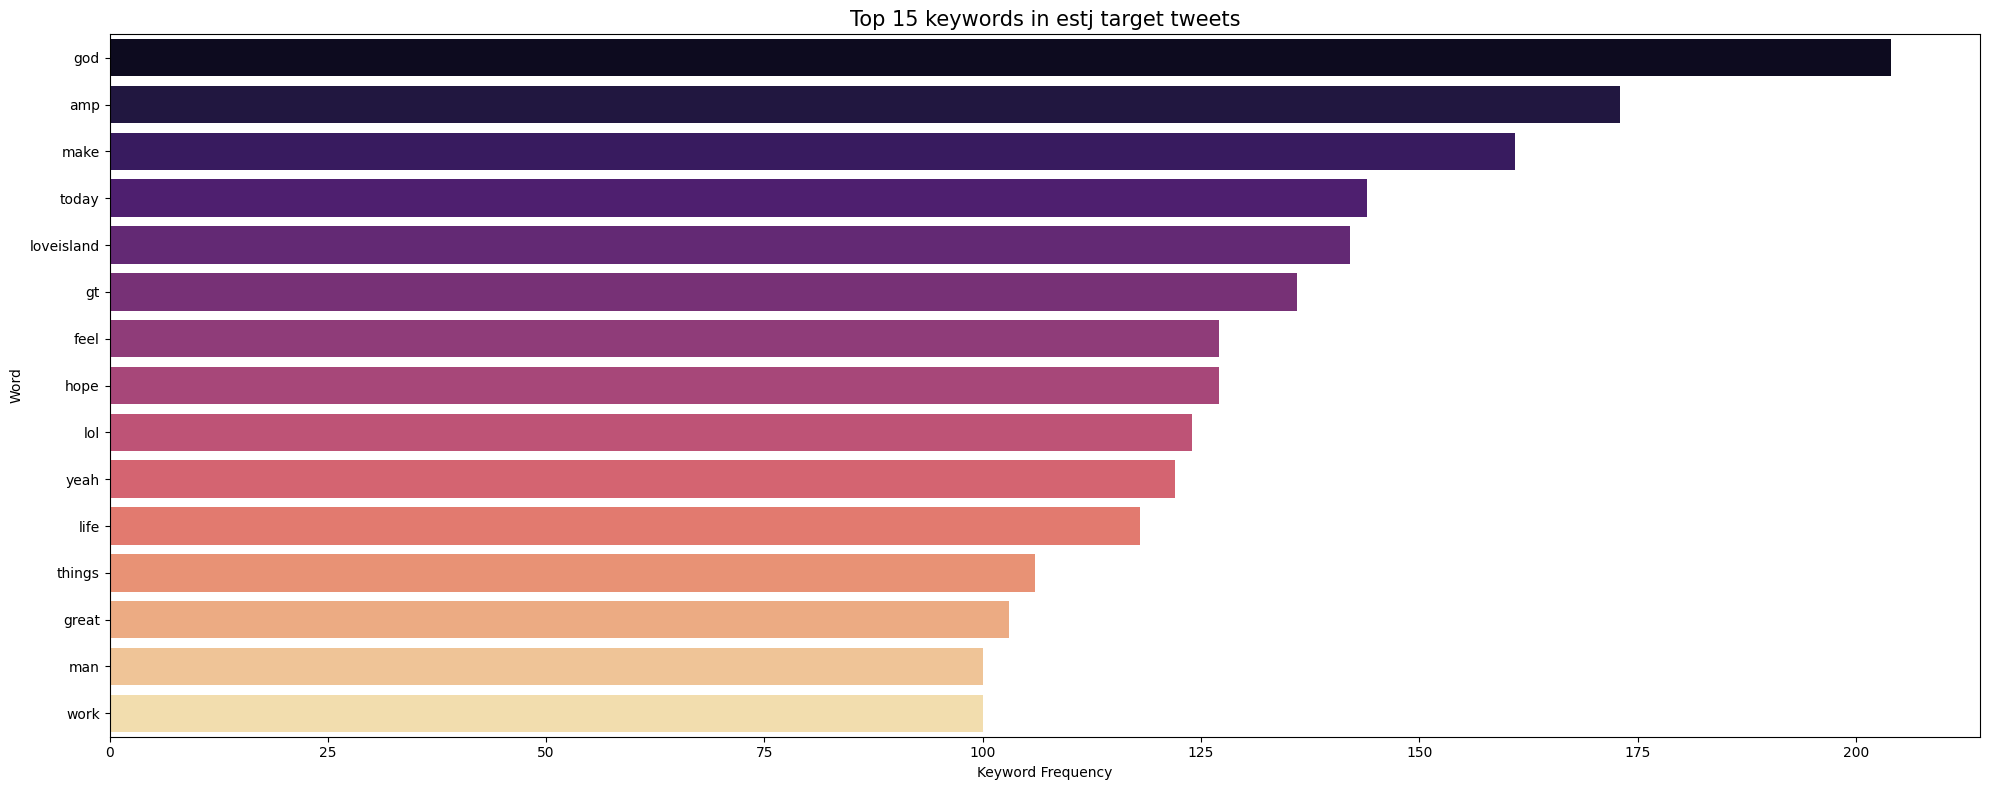

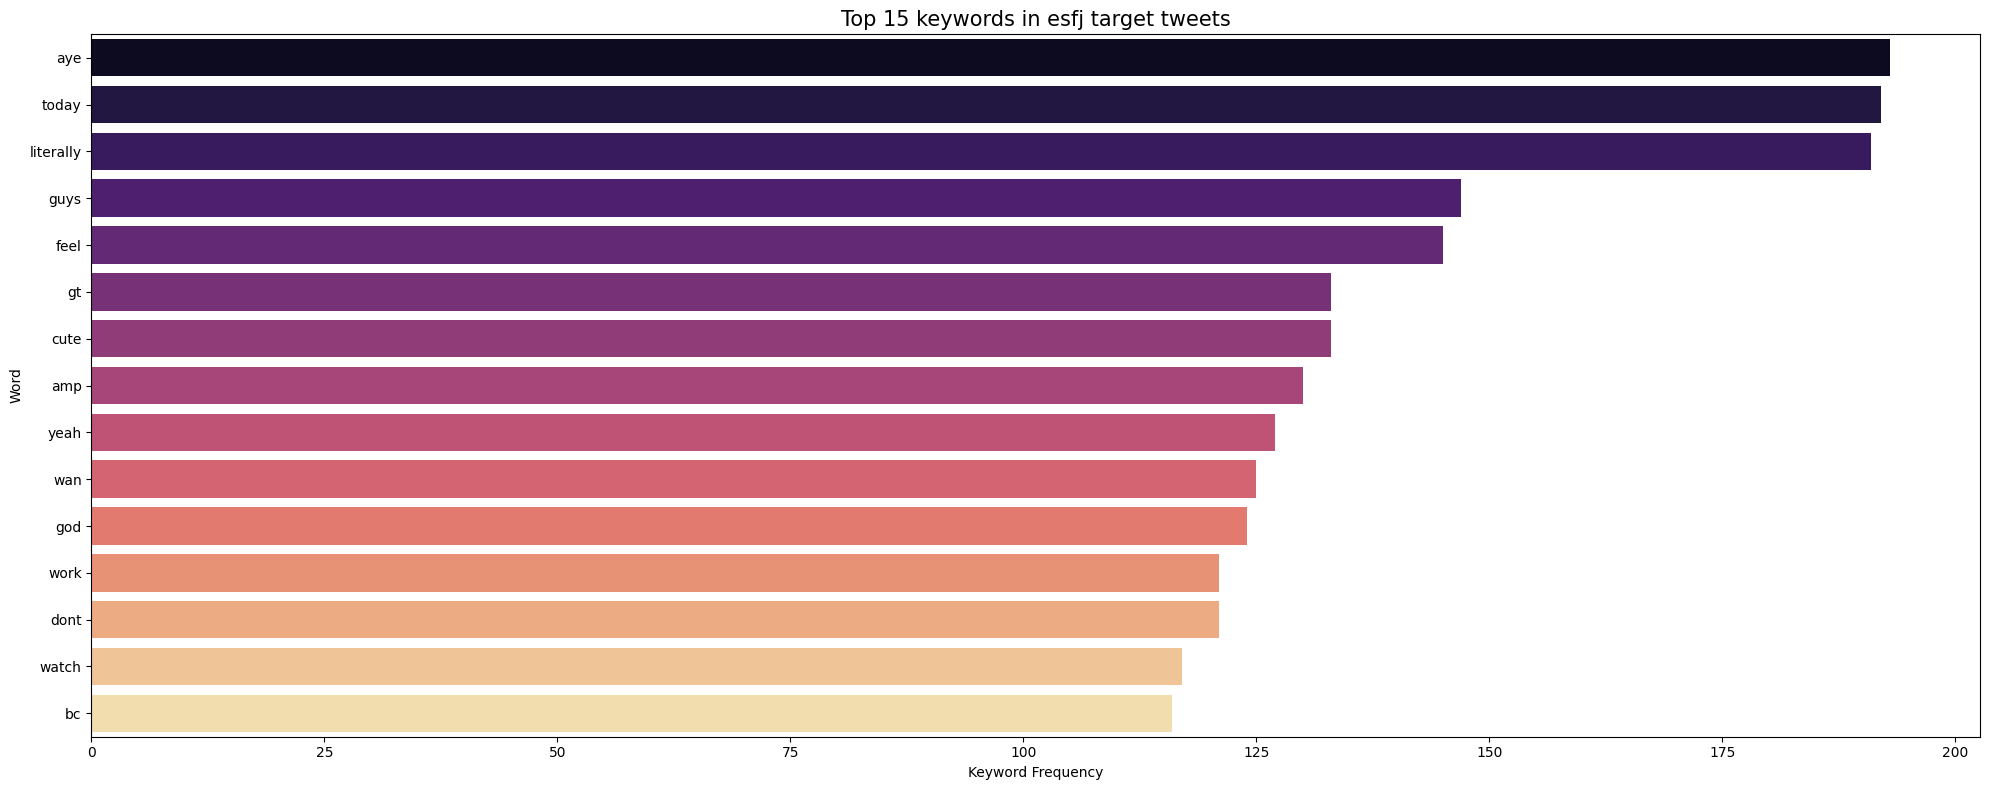

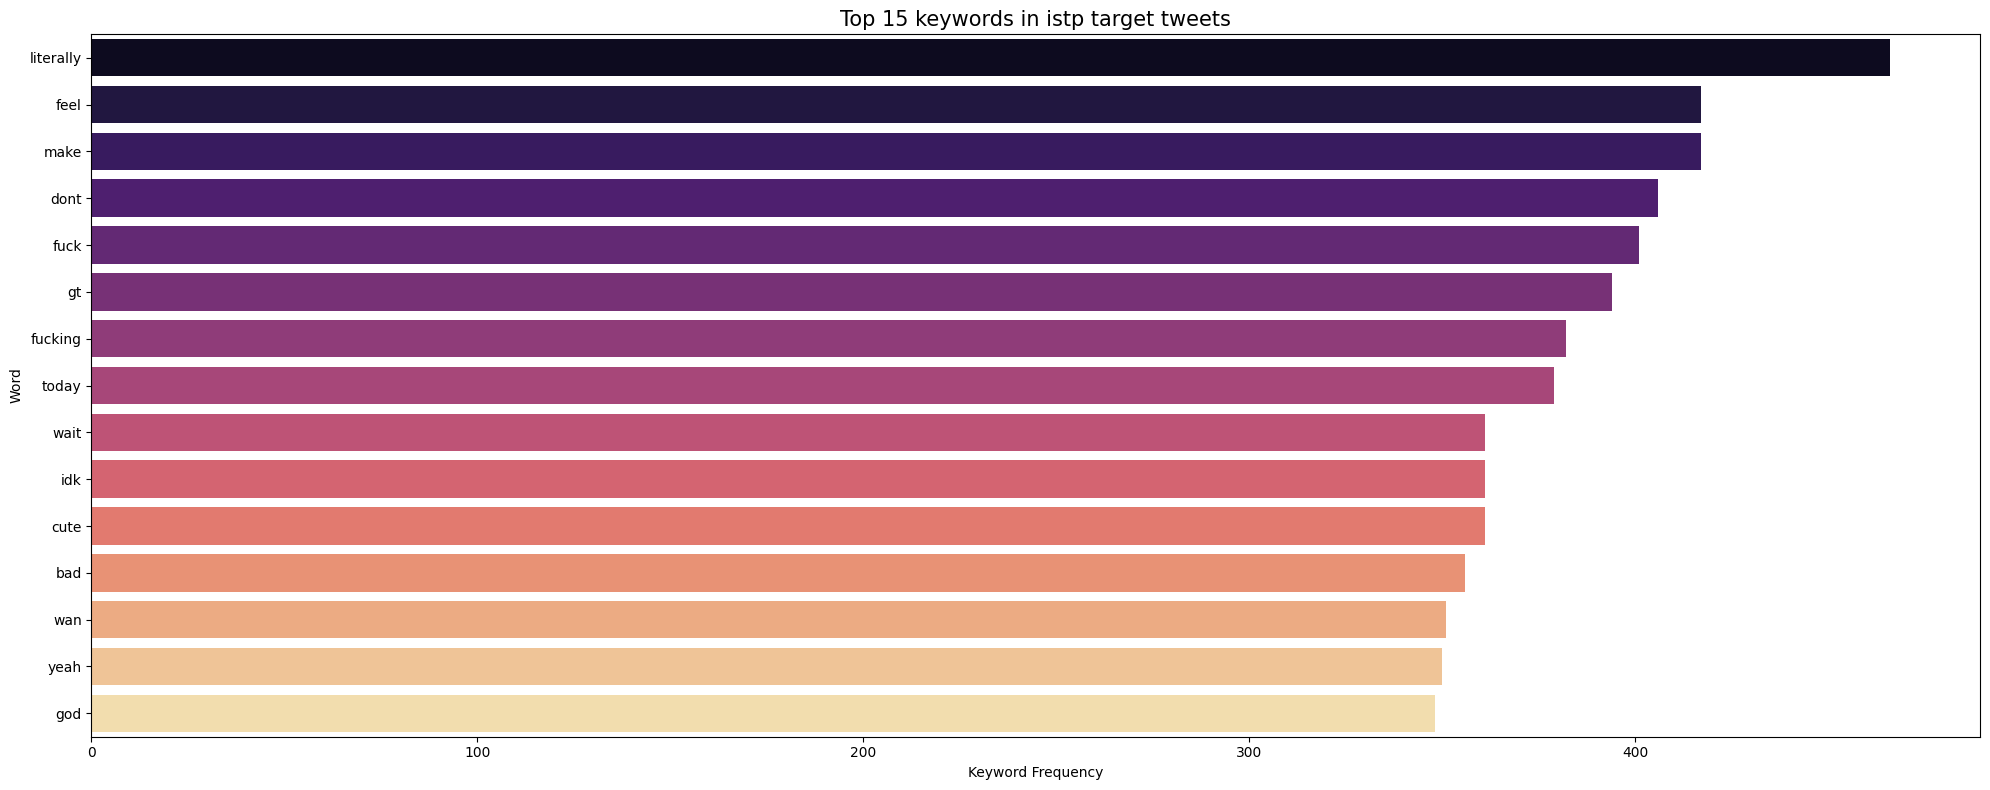

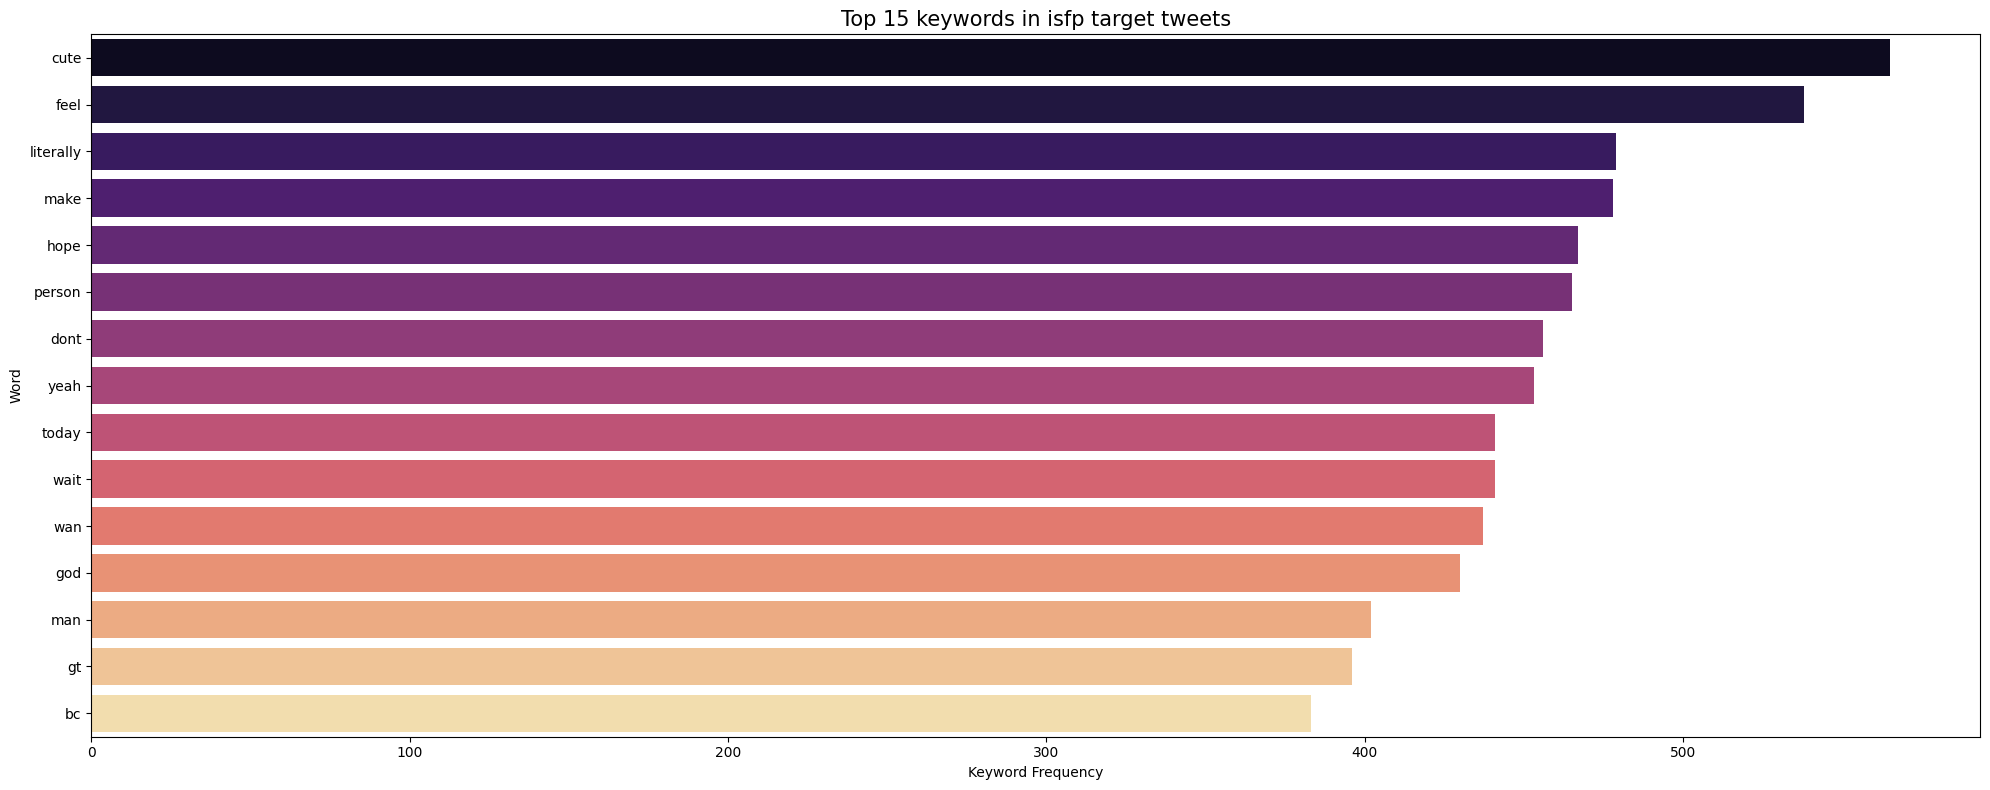

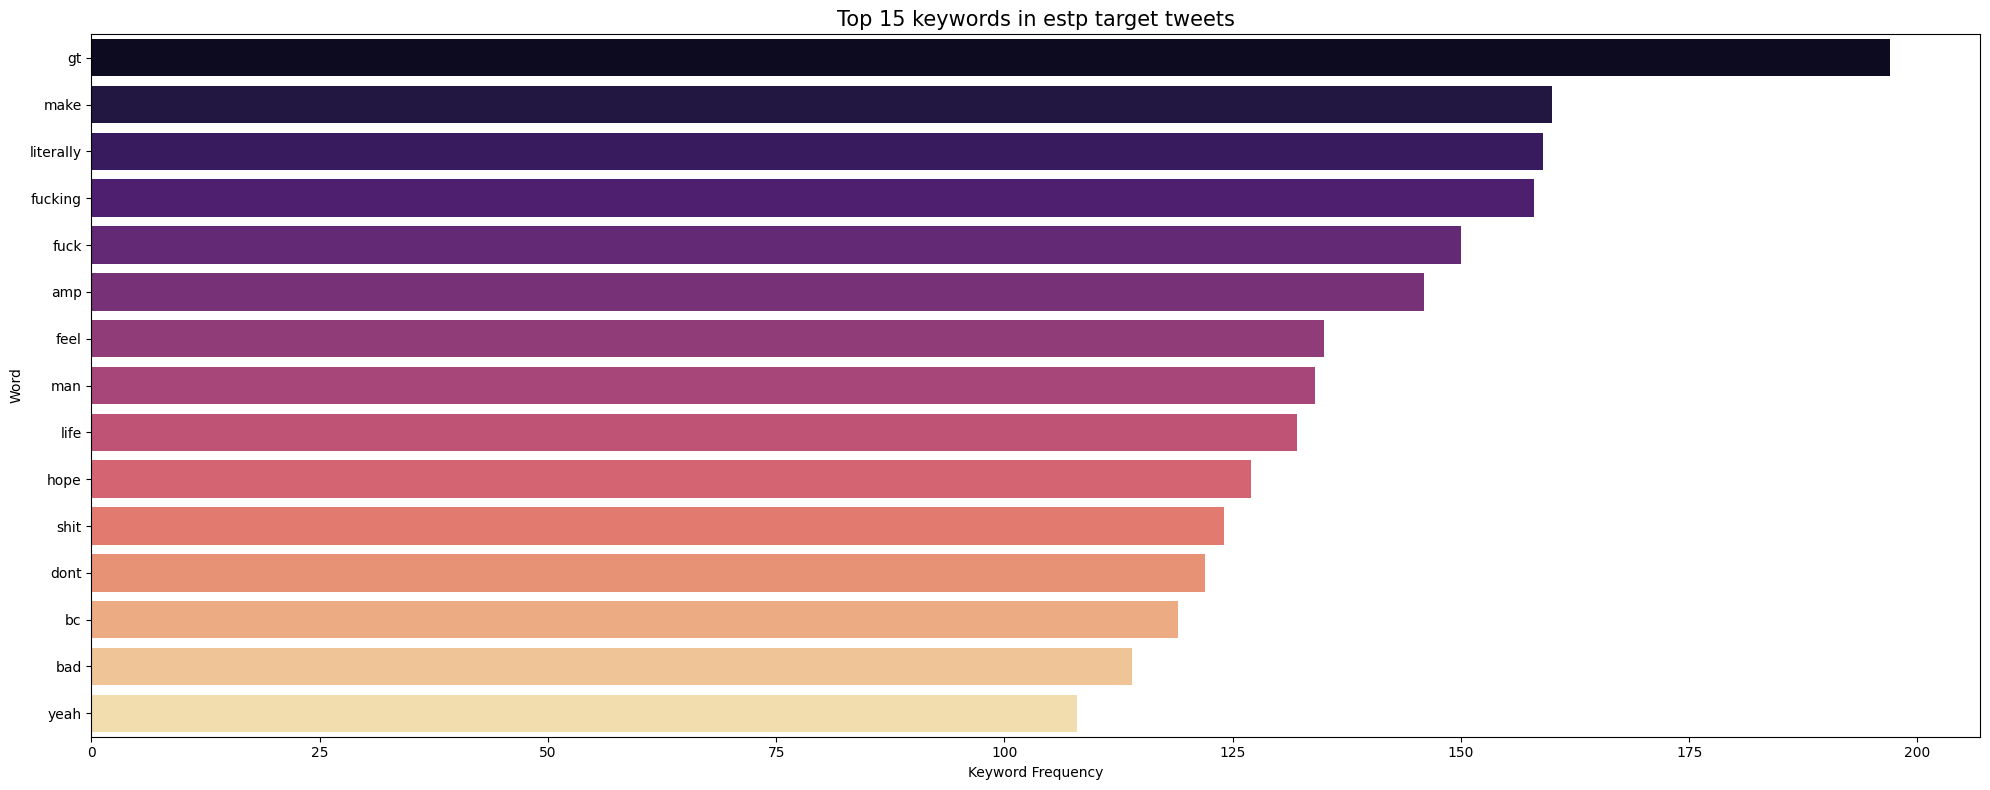

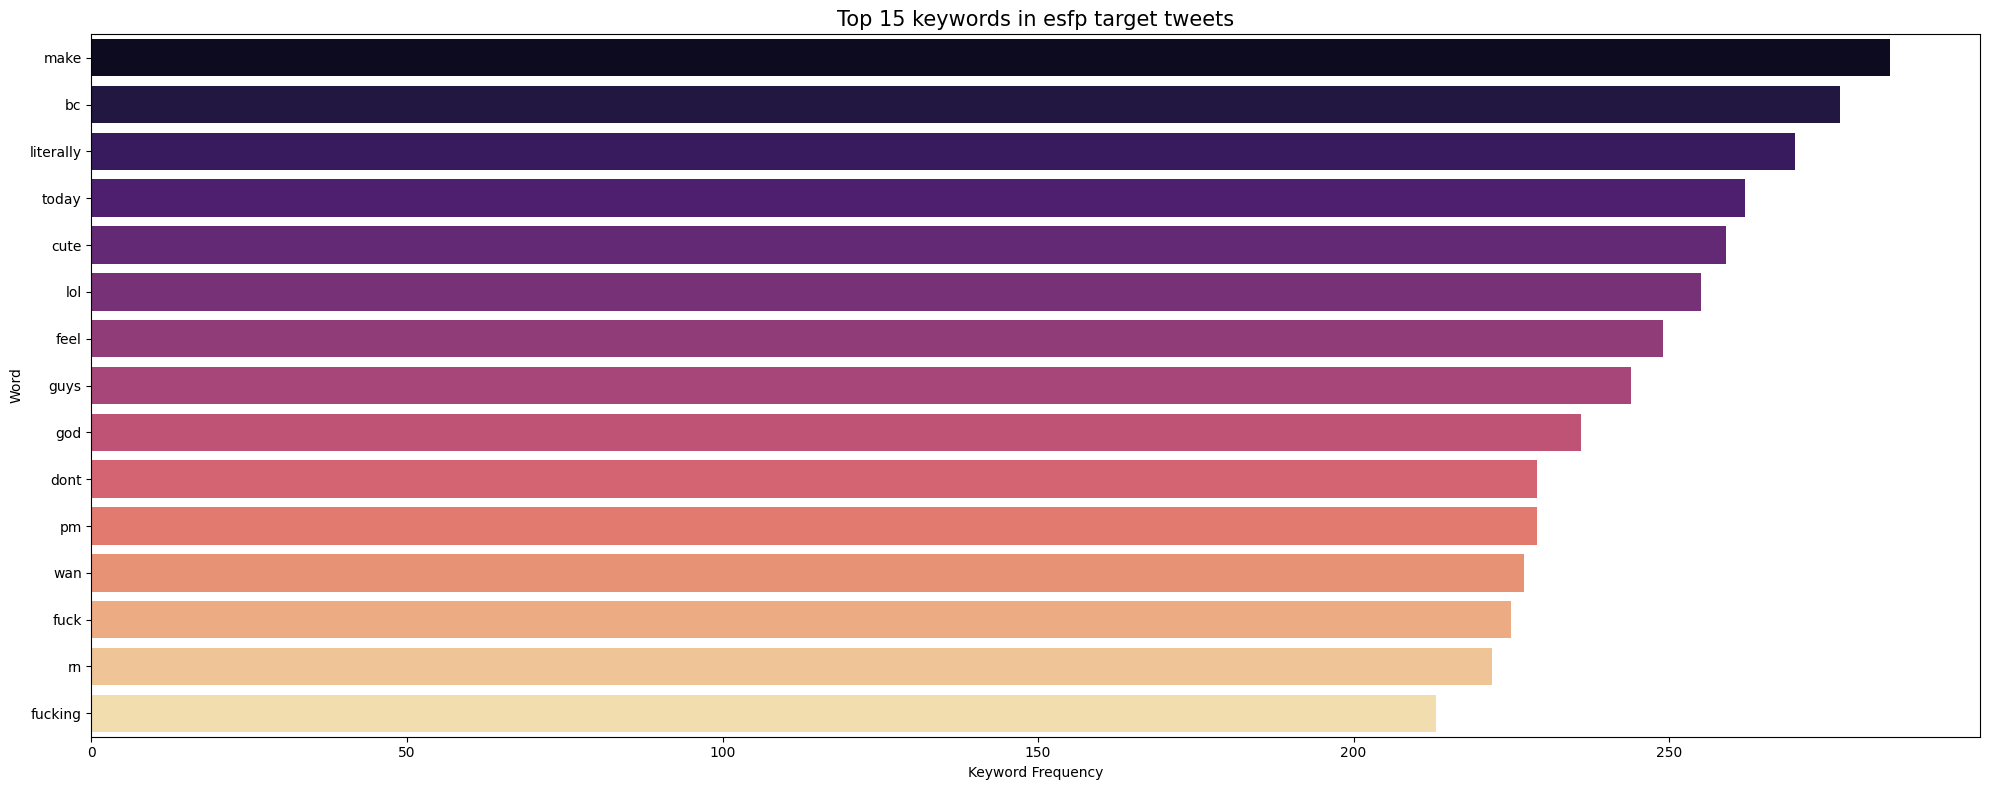

In [ ]:
import re

# noisy words
UNWANTED_WORDS = set([
    "i", "it", "ur", "na", "omg", "people", "time", "good", "back", "gon", "day", "love", "happy", "lt", "kst", 'im'
])

for l in df['label'].unique():
    label_text = " ".join(cat.strip() for cat in df[df.label == l]['text'])

    words = nltk.tokenize.word_tokenize(label_text)
    
    filtered_words = [
        w for w in words if w.isalnum() and w not in STOPWORDS and w.lower() not in UNWANTED_WORDS
    ]
    
    label_keywords = nltk.FreqDist(filtered_words)
    label_keywords = pd.DataFrame(label_keywords.most_common(15), columns=['Word', 'Frequency']).set_index('Word')

    fig, ax = plt.subplots(figsize=(20, 8))
    sns.barplot(y=label_keywords[0:15].index, x=label_keywords[0:15].Frequency, orient='h', ax=ax, palette="magma")

    # settings
    ax.set_title(f'Top 15 keywords in {l} target tweets', fontsize=15)
    ax.set_xlabel('Keyword Frequency')

    plt.tight_layout()
    plt.show()